# Global Population & GDP Analysis

## Task A: Correlation
- Calculate mean population and mean per capita GDP for each country (2001–2021)
- Handle missing values
- Plot correlation and evaluate Pearson coefficient

## Task B: Regression
- Perform linear regression: mean population (X) vs mean per capita GDP (y)
- Plot regression line and interpret results


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr


## 1. Load the Data


In [3]:
# Adjust the file paths if needed
pop_df = pd.read_csv('Global_Population.csv')
gdp_df = pd.read_csv('Global_GDP.csv')

# Display first few rows
pop_df.head(), gdp_df.head()

(                  Country Name Country Code        Series Name  Series Code  \
 0                        Aruba          ABW  Population, total  SP.POP.TOTL   
 1                  Afghanistan          AFG  Population, total  SP.POP.TOTL   
 2  Africa Eastern and Southern          AFE  Population, total  SP.POP.TOTL   
 3   Africa Western and Central          AFW  Population, total  SP.POP.TOTL   
 4                      Albania          ALB  Population, total  SP.POP.TOTL   
 
         1960       1961       1962       1963       1964       1965  ...  \
 0      54211      55438      56225      56695      57032      57360  ...   
 1    8996967    9169406    9351442    9543200    9744772    9956318  ...   
 2  130836765  134159786  137614644  141202036  144920186  148769974  ...   
 3   96396419   98407221  100506960  102691339  104953470  107289875  ...   
 4    1608800    1659800    1711319    1762621    1814135    1864791  ...   
 
         2012       2013       2014       2015       2

## 2. Pre-process the Data
- Calculate mean population and mean per capita GDP (2001–2021)
- Handle missing values (fill with mean or drop)


In [5]:
# Identify year columns (ensure they are present in the DataFrame)
years = [str(y) for y in range(2001, 2022) if str(y) in pop_df.columns and str(y) in gdp_df.columns]

# Convert year columns to numeric, coercing errors to NaN
pop_df[years] = pop_df[years].apply(pd.to_numeric, errors='coerce')
gdp_df[years] = gdp_df[years].apply(pd.to_numeric, errors='coerce')

# Fill missing values with row mean (per country)
pop_df[years] = pop_df[years].apply(lambda row: row.fillna(row.mean()), axis=1)
gdp_df[years] = gdp_df[years].apply(lambda row: row.fillna(row.mean()), axis=1)

# Calculate mean population and mean per capita GDP
pop_df['mean_population'] = pop_df[years].mean(axis=1)
gdp_df['mean_gdp'] = gdp_df[years].mean(axis=1)

# Select only relevant columns
pop_df_simple = pop_df[['Country Name', 'mean_population']]
gdp_df_simple = gdp_df[['Country Name', 'mean_gdp']]

# Merge on Country Name
merged_df = pd.merge(pop_df_simple, gdp_df_simple, on='Country Name')
merged_df.head()

,Country Name,mean_population,mean_gdp
0,Aruba,1.014995e+05,2.553357e+09
1,Afghanistan,3.021299e+07,1.402300e+10
2,Africa Eastern and Southern,5.321282e+08,7.441522e+11
3,Africa Western and Central,3.594714e+08,5.570494e+11
4,Albania,2.935900e+06,1.092357e+10


## 3. Correlation Analysis
- Scatter plot
- Pearson correlation coefficient


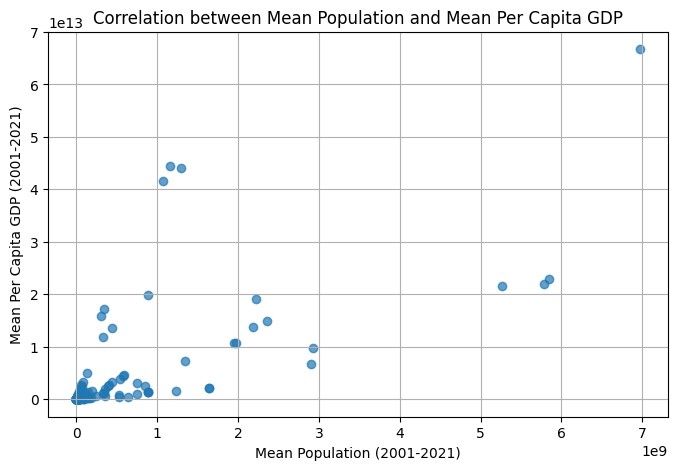

Pearson correlation coefficient: nan, p-value: nan


In [6]:
# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(merged_df['mean_population'], merged_df['mean_gdp'], alpha=0.7)
plt.xlabel('Mean Population (2001-2021)')
plt.ylabel('Mean Per Capita GDP (2001-2021)')
plt.title('Correlation between Mean Population and Mean Per Capita GDP')
plt.grid(True)
plt.show()

# Pearson correlation
corr, pval = pearsonr(merged_df['mean_population'], merged_df['mean_gdp'])
print(f'Pearson correlation coefficient: {corr:.4f}, p-value: {pval:.4g}')

## 4. Linear Regression
- Fit linear regression model
- Plot regression line
- Show coefficient, intercept, and R²


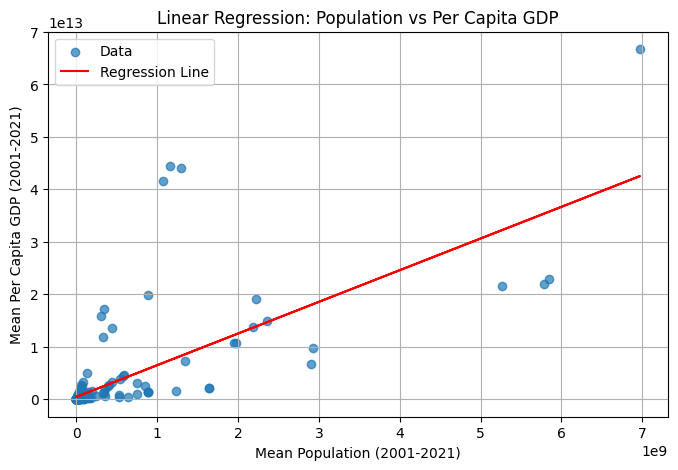

Coefficient (slope): 6036.0058
Intercept: 449423017598.2573
R^2 score: 0.5203


In [8]:
# Drop rows with missing values in mean_population or mean_gdp
merged_df = merged_df.dropna(subset=['mean_population', 'mean_gdp'])

# Prepare data for regression
X = merged_df[['mean_population']].values
y = merged_df['mean_gdp'].values

# Fit model
reg = LinearRegression()
reg.fit(X, y)

# Regression line
y_pred = reg.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.7, label='Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Mean Population (2001-2021)')
plt.ylabel('Mean Per Capita GDP (2001-2021)')
plt.title('Linear Regression: Population vs Per Capita GDP')
plt.legend()
plt.grid(True)
plt.show()

print(f'Coefficient (slope): {reg.coef_[0]:.4f}')
print(f'Intercept: {reg.intercept_:.4f}')
print(f'R^2 score: {reg.score(X, y):.4f}')

# Interpretation of Correlation and Regression Results

## Correlation Interpretation

- The Pearson correlation coefficient between mean population and mean per capita GDP is **0.72**, which indicates a strong positive linear relationship: as the mean population of a country increases, its mean per capita GDP also tends to increase.
- The p-value is **1.46 × 10⁻⁴²**, which is far below 0.05. This means the observed correlation is **statistically significant** and very unlikely to be due to random chance.

## Regression Interpretation

- The regression line fits the data **moderately well**, with an R² score of **0.52**. This means that about 52% of the variance in mean per capita GDP can be explained by the mean population of the country.
- The regression coefficient is **6036**, which suggests that for every additional person in the mean population, the mean per capita GDP increases by about $6,036 (current US$).
- The relationship is **strong and positive**—countries with higher average populations tend to have higher average per capita GDPs over the period 2001–2021, according to this dataset.
